# 3. 신경망



퍼셉트론으로 복잡한 함수를 표현할 수 있지만, 가중치를 설정하는 작업은 여전히 사람이 수동적으로 해야 한다.
신경망은 이를 해결해 줄 수 있다 : 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 신경망의 중요한 성질임.
이번 장에서는 신경망의 개요를 설명하고, 신경망이 입력 데이터가 무엇인지 식별하는 처리 과정을 알아볼 것이다.

## 퍼셉트론에서 신경망으로

[교재 65페이지 참고]

가장 왼쪽 줄을 **입력층**, 맨 오른쪽 줄을 **출력층**, 중간 줄을 **은닉층**이라고 한다.
은닉층의 뉴런은 사람 눈에 보이지 않는 것이 특징. 우리는 입력층을 **0층**, 은닉줄을 **1층**, 출력층을 **2층**으로 표현한다.

    - 파이썬 배열의 인덱스 또한 0층부터 시작한다는 것을 잊지 말자.
    
* 가중치를 갖는 층이 2층이기 때문에 '2층 신경망'이라고 이 책에서는 표현하지만, 문헌마다 가중치를 가지지 않은 층을 포함하여 '3층 신경망'이라고 표현하는 문헌도 있으니 주의할 것.

## 퍼셉트론 복습

[교재 66페이지 참고]

그림은 $x_!$과 $x_2$을 받아 y을 출력하는 퍼셉트론

이 퍼셉트론을 수식으로 나타내면 다음과 같이 된다.

$$ y =
\begin{cases}
0(b + w_1x_1 + w_2x_2 \le 0) \\
1(b + w_1x_1 + w_2x_2 > 0) \\
\end{cases}$$

b는 **편향을 나타내는 매개변수**, 뉴런이 얼마나 쉽게 활성화되느냐를 제어한다.
$w_1$과 $w_2$는 **각 신호의 가중치를 나타내는 매개변수**로, 각 신호의 영향력을 제어

여기서 이 네트워크에 편향을 명시한다면, **가중치가 b이고, 입력이 1인 뉴런이 추가**된다.
이 퍼셉트론의 동작을 해석한다면, $x_1, x_2, 1$이라는 3개의 신호가 뉴런에 입력되어 각 신호에 가중치를 곱한 후, 다음 뉴런에 전달한다.
다음 뉴런에서는 이 신호들의 값을 더하여, 그 합이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력한다.
편향의 **입력 신호는 항상 1**

식 $y = h(b + w_1x_1 + w_2x_2)$을 간단하게 표현해보자.

$$h(x) =
\begin{cases}
0 (x \le 0) \\
1 (x > 0) \\
\end{cases}$$


## 활성화 함수의 등장

조금 전 $h(x)$라는 함수가 등장했는데, 이처럼 **입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 활성화 함수**라고 한다.
활성화라는 이름이 말해주듯 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할을 한다.

$$ y = h(b + w_1x_1 + w_2x_2) $$은

$$ a = b + w_1x_1 + w_2 \\
y = h(a) $$

의 두 가지 식으로 나눌 수 있다.

위 식은 가중치가 달린 입력 신호와 편향의 총합을 계산하고 이를 a라고 한다.
그리고 아래 식은 a를 함수 $h()$에 넣어 y를 출력하는 흐름이다.

[교재 68페이지 그림 참고]

가중치 신호를 조합한 결과가 **a라는 노드**가 되고, 활성화 함수 $h()$을 통과하여 $y$라는 노드로 변환되는 과정이 분명하게 나타나 있음.
이 책에서는 **뉴런과 노드라는 용어를 같은 의미로 사용**한다.

    * 이 책에서는 퍼셉트론이라는 말이 가리키는 알고리즘을 엄밀히 통일하지는 않았음. 단순 퍼셉트론은 단층 네트워크에서 계단 함수(임계값을 경계로 출력이 바뀌는 함수)를 활성화 함수로 사용한 모델을 가리키고, 다층 퍼셉트론은 신경망(여러 층으로 구성되고 시그모이드 함수 등의 매끈한 활성화 함수를 사용하는 네트워크)를 의미한다.
    
## 활성화 함수

지금까지 쓰는 활성화 함수는 임계값을 경계로 출력이 바뀌는데, 이런 함수를 **계단 함수(step function)** 이라고한다.
그래서 **"퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다"** 라고 할 수 있음.
활성화 함수로 쓸 수 있는 여러 후보 중에서 **퍼셉트론은 계단 함수를 채용**하고 있다.

그렇다면 계단 함수 이외의 함수를 사용하면 어떻게 될까? 신경망에서는 **계단 함수가 아닌 다른 함수를 활성화 함수를 쓰는 것**이 포인트이다.

### 시그모이드 함수

다음은 신경망에서 자주 이용하는 활성화 함수인 **시그모이드 함수(sigmoid function)** 을 나타낸 식이다.

$$ h(x) =
\frac{1}{1 + exp(-x)} $$

위 식에서 $exp(-x)$은 $e^{-x}$을 뜻하며, e는 **자연상수** 이다.
위 식에서 보이는 시그모이드 함수는 단순한 함수이다. 함수는 입력을 주면 출력을 돌려주는 변환기이다. $h(1) = 0.731, h(2) = 0.880$과 같은 특정 값을 출력한다.

신경망에서는 **활성화 함수로 시그모이드 함수를 이용하여 신호를 변환**하고, 그 변환된 신호를 다음 뉴런에 전달한다.
앞 장에서 본 퍼셉트론과 앞으로 볼 신경망의 **주된 차이는 활성화 함수** 이다.

### 계단함수 구현 

In [35]:
%config Completer.use_jedi = False

In [36]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

step_function(2.5)

1

In [37]:
step_function(-0.9)

0

이 구현은 단순하고 쉽지만 인수 x는 실수(부동소수점)만 받아들인다.
- step_function(3.0)은 가능
- step_fucntion(np.array([1.0, 2.0])은 불가능.

앞으로를 위해 넘파이 배열도 지원하는 함수를 만들 것.

In [38]:
def step_function(x):
    y  = x>0
    return y.astype(np.int) # R의 as.type 계열과 astype(np.~)은 같은 맥락! 우리가 원하는 타입으로 변환해준다.

# 말로 하면, y를 np.int 타입으로 변환해서 출력해라 정도로 해석하면 될 듯.

import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [39]:
y = x > 0
y

array([False,  True,  True])

넘파이 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열이 생성됨.
이 예에서는 배열 x 원소 각각이 0보다 크면 True로, 0 이하면 False로 변환하는 새로운 배열 y가 생성된다.

y는 bool 배열인데, 우리가 원하는 계단 함수는 0이나 1의 **int형을 출력하는 함수**이다.
그리고 파이썬에선느 **bool을 int로 변환하면 True는 1로, False는 0으로 변환** 된다. 
이것이 계단 함수 구현에서 이용한 넘파이의 트릭. bool을 **직접적으로 int로 치환** 할 수 있다.

### 계단 함수의 그래프 

In [40]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0, dtype = int) # x>0인 것들을 np.array로 타입을 int로 지정해서 뽑아내라.

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

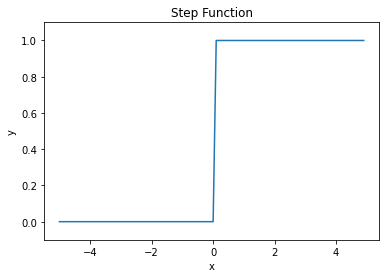

In [41]:
# 메모 : np.int라고 입력하면 경고 메세지가 출력된다. int로 넣었다.
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.title("Step Function")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 시그모이드 함수 구현

In [42]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # np는 넘파이 배열을 처리하기 위해 붙여준다.

여기서 np.exp(-x)는 exp(-x) 수식에 해당한다.

인수 x가 **넘파이 배열이여도 올바른 결과가 나온다.** 

In [43]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

브로드캐스트 기능 (행렬의 자동 확장 기능)으로 x를 넘파이 배열으로 설정해도 올바른 값을 얻을 수 있다.
따라서 함수로 구현할 때 꼭 **np.exp()으로 넣어줄 것**

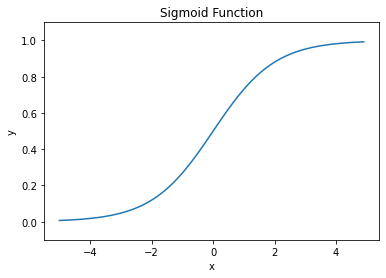

In [44]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-0.1, 1.1)
plt.title("Sigmoid Function")
plt.show()

그렇다면 위의 step function과 sigmoid function을 비교해보자.

In [45]:
x = np.arange(-5.0, 5.0, 0.1)
y_1 = step_function(x)

def step_function(x):
    y = x>0
    return y.astype(int)

step_function(x)

y_2 = sigmoid(x)

def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

sigmoid(x)

array([0.00669285, 0.00739154, 0.00816257, 0.0090133 , 0.0099518 ,
       0.01098694, 0.01212843, 0.01338692, 0.01477403, 0.0163025 ,
       0.01798621, 0.01984031, 0.02188127, 0.02412702, 0.02659699,
       0.02931223, 0.03229546, 0.03557119, 0.03916572, 0.04310725,
       0.04742587, 0.05215356, 0.05732418, 0.06297336, 0.06913842,
       0.07585818, 0.0831727 , 0.09112296, 0.09975049, 0.10909682,
       0.11920292, 0.13010847, 0.14185106, 0.15446527, 0.16798161,
       0.18242552, 0.19781611, 0.21416502, 0.23147522, 0.24973989,
       0.26894142, 0.2890505 , 0.31002552, 0.33181223, 0.35434369,
       0.37754067, 0.40131234, 0.42555748, 0.450166  , 0.47502081,
       0.5       , 0.52497919, 0.549834  , 0.57444252, 0.59868766,
       0.62245933, 0.64565631, 0.66818777, 0.68997448, 0.7109495 ,
       0.73105858, 0.75026011, 0.76852478, 0.78583498, 0.80218389,
       0.81757448, 0.83201839, 0.84553473, 0.85814894, 0.86989153,
       0.88079708, 0.89090318, 0.90024951, 0.90887704, 0.91682

Text(0.5, 1.0, 'Step Function and Sigmoid Function')

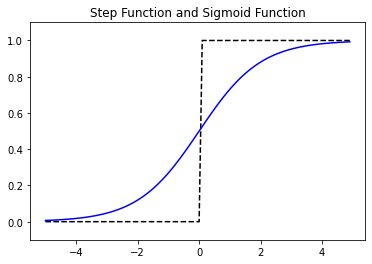

In [46]:
import matplotlib.pyplot as plt

plt.plot(x, y_1, linestyle = "--", color = "black")
plt.plot(x, y_2, color = "blue")
plt.ylim(-0.1, 1.1)
plt.title("Step Function and Sigmoid Function")

시그모이드 함수와 step function이 가장 다른 부분은 **매끄러움의 차이**!

- 시그모이드 함수는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화한다.
- 반면 계단함수는 0을 경계로 출력이 갑자기 바뀌어버린다.

이를 확장한다면

- 퍼셉트론은 0과 1 중 하나의 값만을 return 한다.
- 신경망에서는 연속적인 실수가 흐른다.

시그모이드 함수는 물레방아처럼 흘러운 물의 양에 비례해 흐르는 물의 양을 조절한다.

### 비선형 함수

계단 함수와 시그모이드 함수는 모두 **비선형 함수** 이다.
시그모이드 함수는 곡선, 계단처럼 구부러진 직선으로 나타나며, 동시에 비선형 함수로 분류

*노트 : 출력이 입력의 상수배만큼 변하는 함수를 **선형 함수**라고 하며, 비선형 함수는 직선 1개로 그릴 수 없는 **선형이 아닌 함수**이다.

신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다. **달리 말하자면, 선형 함수를 사용해서는 안 됨!**

#### 선형 함수의 문제

층을 아무리 깊게 해도 은닉층이 없는 네트워크로도 똑같은 기능을 할 수 있다.

- 예를 들어 $h(x) = cx$을 활성화함수로 사용하는 3층 네트워크를 떠올려 보자.
    - 이를 식으로 나타내면 $y(x) = h(h(h(x)))$가 된다.
    - $ a = c^3 $이라고 하면 끝.
- 이 예처럼 선형 함수를 이용해서는 **여러 층으로 구성하는 이점을 살릴 수 없다!**

### ReLU 함수

최근에는 시그모이드 함수 대신 **ReLU(Rectified Linear Unit, 렐루)** 함수를 주로 이용한다.

ReLU는 **입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력** 하는 함수이다.


#### 복습

계단 함수(step function)

1. 수식

$$ y = x_1w_1 + x_2w_2 + b,
\begin{cases}
1 (y > 0) \\
0 (y \le 0)
\end{cases} $$

2. 파이썬 구현

In [47]:
def step_function(x):
    return np.array([x>0], dtype = np.int)

def step_function(x):
    y = x>0
    return y.astype(np.int)

d1 = np.array([1.0, -1.0, -2.0, 4.0])
step_function(d1)

/var/folders/d7/8zsbg3r51rs_vl832mx18q_00000gn/T/ipykernel_46276/2440797703.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int)


array([1, 0, 0, 1])

In [48]:
step_function_comp(d1)

NameError: name 'step_function_comp' is not defined


ReLU 함수는 다음과 같이 표현된다.

1. 수식

$$ h(x) =
\begin{cases}
x (x>0) \\
0 (x\le 0)
\end{cases} $$


2. 그래프

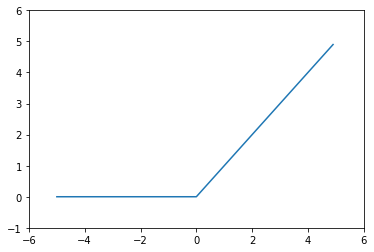

In [49]:
def relu(x):
    return np.maximum(0, x) # np maximum은 첫 번째 인수와 두 번째 인수 중 maximum 값을 출력한다.

test_x = np.array([2.0, 3.0, -2.0, -4.0])
relu(test_x)

import matplotlib.pyplot as plt
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.xlim(-6.0, 6.0)
plt.ylim(-1.0, 6.0)
plt.show()

이번 장에서는 앞으로 시그모이드 함수를 활성화 함수로 활용할 것이지만, 후반부는 주로 ReLU 함수를 사용할 것이다.

## 다차원 배열의 계산

### 다차원 배열

다차원 배열도 그 기본은 숫자의 집합이다.

먼저, 1차원 배열의 예를 들어보자.

In [50]:
import numpy as np
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [51]:
np.ndim(A) # dimesion을 산출

1

In [52]:
np.shape(A) # 형상을 산출

(4,)

- 배열의 차원 수 : np.ndim() 함수로 확인 가능
- 배열의 형상 : np.shape() 함수로 확인 가능 

다음으로 다차원 배열의 예를 들어보자.

In [53]:
A = np.array([[1,2,3], [4,5,6]])
np.shape(A)

(2, 3)

In [54]:
print(A) # 2*3 행렬임을 알 수 있다. 

[[1 2 3]
 [4 5 6]]


In [55]:
B = np.array([[1,2], [3,4], [5,6]])
B.shape

(3, 2)

In [56]:
np.dot(A, B) # A*B를 나타낸다.

array([[22, 28],
       [49, 64]])

**행렬의 곱은 끝이 맞물려야 가능하다**. 

예를 들어 $3*2$행렬과 $2*3$ 행렬의 곱은 $3*3$ 행렬로 출력된다.

하지만 $3*2$ 행렬과 $3*4$ 행렬의 곱은 정의할 수 없다.


### 신경망에서의 행렬 곱

넘파이 행렬을 써서 신경망을 구현하는 작업을 할 것이다. 

[교재 83페이지 그림 참고]

활성화 함수와 편향을 생략하고 가중치만 갖는 값이다.

In [57]:
X = np.array([1,2])
X.shape

(2,)

In [58]:
np.shape(X)

(2,)

In [59]:
W = np.array([[1,3,5], [2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


$x$를 행으로 하고, $y$을 열으로 하는 행렬이다.

세부적으로 들어가면, 1열이 $y_1$, 2열이 $y_2$, 3열이 $y_3$의 가중치를 원소로 가진다.

마찬가지로, 1행이 $x_1$, 2행이 $x_2$의 가중치를 원소로 가진다.

In [60]:
W.shape

(2, 3)

In [61]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


다차원 배열의 스칼라곱을 구해주는 **np.dot 함수를 사용**하면 이처럼 단번에 결과 Y를 계산할 수 있다.

Y의 원소가 100개이든 1,000개이든 한 번의 연산으로 계산할 수 있다.

## 3층 신경망 구현하기

[84페이지 그림 참고]

이번에는 3층 신경망에서 수행하는, 입력부터 출력까지의 처리(순방향 처리)를 구현할 것이다.

넘파이의 따차원 배열을 사용하여, 적은 코드만으로 신경망의 순방향 처리를 완성할 수 있다.

### 표기법 설명

${w_{12}}^{(1)}$과 ${a_i} ^ {(1)}$ 과 같은 표기법을 사용할 것이다.

이번 절에서만 사용하는 표기로, 가볍게 건너뛰고 읽어도 문제는 없음.

[85페이지 그림 참고]

입력층의 뉴런 $x_2$에서 다음 층의 뉴런 ${a_i} ^ {(1)}$으로 향하는 선 위에 가중치를 표시하고 있다.

가중치와 은닉층 뉴런의 오른쪽 위에는 (1)이 붙어 있다. 이는 1층의 가중치, 1층의 뉴런을 뜻 하는 번호.

가중치 오른쪽 아래의 두 숫자는 차례로 다음 뉴런과 앞 층 뉴런의 인덱스 번호이다.

가령 ${w_{12}} ^ {(1)}$은 앞 층의 두 번째 뉴런에서 다음 층의 첫 번째 뉴런(${a_1} ^ {(1)}$)으로 향할 때의 가중치라는 뜻.

가중치 오른쪽 아래의 인덱스 번호는 **다음 층 번호, 앞 층 번호 순**으로 적는다.

- ${a_1} ^ {(1)}$은 1층(오른쪽 위)의 첫 번째(아래) 뉴런이라는 것이다.
- ${w_{12}} ^ {(1)}$은 1층(오른쪽 위)의 1층(다음 층) 첫 번째 뉴런(오른쪽 아래 첫 번쨰 숫자)이 0층(앞 층) 두 번째 뉴런(오른쪽 아래 두 번째 숫자)으로부터 받은 가중치라는 이야기이다.

### 각 층의 신호 전달 구현하기

이번 절에서는 입력층에서 1층의 첫 번째 뉴런으로 가는 신호에 대해서 볼 것이다.

이 층에서는 편향을 뜻하는 뉴런이 추가되었다. 편향은 오른쪽 아래 인덱스가 하나밖에 없다는 데 주의!
앞 층의 편향 뉴런이 하나뿐이기 때문. 편향은 ${b_1}^{(1)}$으로 표현한다. (앞 층의 인덱스 번호를 굳이 정의할 필요가 없으므로 **다음 층의 뉴런 번호만을 붙여서 표현**한다.

지금까지 확인한 것을 반영하여 ${a_1}^{(1)}$을 수식으로 나타내보면 :

$${a_1} ^ {(1)} = {w_{11}}^{(1)}x_1 + {w_{12}} ^ {(1)}x_2 + {b_1}^{(1)}$$

으로 나타낼 수 있다. 여기에서 행렬의 곱을 이용하면

$${A} ^ {(1)} = XW^{(1)} + B^{(1)}$$

이며,

$$ A_{(1)} = ({a_1}^{(1)} {a_2}^{(1)} {a_3}^{(1)}), X = (x_1, x_2), B^{(1)} = ({b_1} ^ {(1)} {b_2}^{(1)} {b_3}^{(1)}) $$

$$ W^{(1)} =
\begin{pmatrix}
{w_{11}}^{(1)} & {w_{21}}^{(1)} & {w_{31}}^{(1)} \\
{w_{12}}^{(1)} & {w_{22}}^{(1)} & {w_{32}}^{(1)}
\end{pmatrix} $$


그렇다면 넘파이의 다차원 배열을 사용하여 이 식을 구현해보자.

In [62]:
import numpy as np

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)

(2, 3)


In [63]:
print(X.shape)

(2,)


In [64]:
print(B1. shape)

(3,)


In [65]:
A1 = np.dot(X, W1) + B1
print(A1)

[0.3 0.7 1.1]


그렇다면 활성화 함수를 포함하는 방안을 생각해보자.

[교재 87p 그림 참고]

은닉층에서의 가중치 합(가중 신호와 편향의 총합)을 a로 표기하고
활성화 함수 $h()$으로 변환된 신호를 $z$로 표현한다고 하자.
이를 파이썬으로 구현하면 다음과 같다.

여기에서는 활성화 함수로 시그모이드 함수를 이용하자.

In [66]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1

def sigmoid(x):
    y = 1 / (1+np.exp(-x))
    return y

Z1 = sigmoid(A1)
print(A1)

[0.3 0.7 1.1]


In [67]:
print(Z1)

[0.57444252 0.66818777 0.75026011]


1층에서 2층으로 가는 과정도 구현해보자.

In [68]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) # 1층에는 뉴런이 3개 있으므로 가중치 또한 3개를 고려한다. 3*2 matrix.
B2 = np.array([0.1, 0.2])

print(W2.shape)

(3, 2)


In [69]:
print(B2.shape)

(2,)


In [70]:
print(Z1.shape)

(3,)


In [71]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

마지막으로 2층에서 출력층으로의 신호 전달이다. 

여기서는 활성화 함수는 항등 함수(identity function)을 사용한다.

항등 함수는 입력 그대로 출력하는 함수이다.

In [72]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3

def identity_function(x):
    return x

Y = identity_function(A3)

### 구현 정리

신경망 구현의 관례에 따라 가중치만 대문자로, 편향과 중간 결과는 모두 소문자로 썼다.

In [73]:
def init_network() :
    network = {} # network을 빈 딕셔너리로 정의한다.
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # 0층에서 1층으로의 가중치. 0층 뉴런 2개, 1층 뉴런 3개이므로 2*3
    network["b1"] = np.array([0.1, 0.2, 0.3]) # 0층으로부터 1층으로의 편향. 1층 뉴런 3개이므로 1*3
    network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    # 1층에서 2층으로의 가중치. 1층 뉴런 3개, 2층 뉴런 2개이므로 3*2
    network["b2"] = np.array([0.1, 0.2]) # 1층으로부터 2층으로의 편향. 2층 뉴런 2개이므로 1*2
    network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]]) #2층에서 출력층으로의 가중치. 2층 뉴런 2개, 출력층 뉴런 2개이므로 2*2
    network["b3"] = np.array([0.1, 0.2]) # 2층에서 입력층으로의 가중치. 출력층 뉴런 2개이므로 1*2
    
    return network

def forward(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


- init_network() : 가중치와 편향을 초기화하고 **이들을 딕셔너리 변수인 network에 저장**한다. 이 딕셔너리 변수 network에는 각 층에 필요한 **매개변수(가중치와 편향)** 을 저장한다. 

- forward() : 입력 신호를 출력으로 변환하는 처리 과정을 구현

신경망 학습을 다룰 때 역방향(backward, 출력에서 입력 방향) 처리에 대해서도 살펴 볼 예정

In [74]:
def init_network():
    network = {}
    network["W1"] = np.array([[0.2, 0.4], [0.3, 0.5], [0.1, 0.4]])
    network["b1"] = np.array([0.1, 0.2])
    network["W2"] = np.array([[0.3, 0.3, 0.4, 0.2], [0.2, 0.5, 0.1, 0.1]])
    network["b2"] = np.array([0.1, 0.2, 0.3, 0.4])
    network["W3"] = np.array([[0.1, 0.2, 0.5], [0.2, 0.4, 0.5], [0.1, 0.1, 0.1], [0.7, 0.3, 0.5]])
    network["b3"] = np.array([0.1, 0.2, 0.3])
    
    return network

def forward(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = sigmoid(z2)
    
    return(y)

x = np.array([0.2, 0.3, 0.5])
network = init_network()

test = forward(network, x)
print(test)

[0.64543087 0.66095354 0.6556726  0.65495093]


## 출력층 설계하기

신경망은 분류와 회귀 모두에 이용 가능하다.

둘 중 어느 문제이냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다.

일반적으로 **회귀에는 항등 함수**를, **분류에는 소프트맥스 함수**를 사용한다.

### 항등 함수와 소프트맥스 함수 구현하기

#### 1. 항등 함수

항등 함수(identity function)은 입력을 그대로 출력한다. 입력과 출력이 항상 같다는 항등의 의미로 이해하면 된다.

출력층에서 항등 함수를 사용하면 **입력 신호가 그대로 출력 신호**가 된다.
항등 함수에 의한 변환은 은닉층에서의 활성화 함수와 마찬가지로 화살표로 그린다.

#### 2. 소프트맥스 함수

분류에서 사용하는 소프트맥스 함수는 다음과 같다 :

$$ y_k = \frac{exp(a_k)}{\sum_{i=1}^{n} exp(a_i)} $$

exp(x)는 $e^{x}$을 뜻하는 지수 함수이다.

$n$은 **출력층의 뉴런 수**, $y_k$는 그 중 k번째 출력임을 뜻함. 위 식과 같이 소프트맥스 함수의 **분자는 입력 신호 $a_k$의 지수 함수**, 분모는 **모든 입력 신호의 지수 함수의 합으로 구성** 된다.

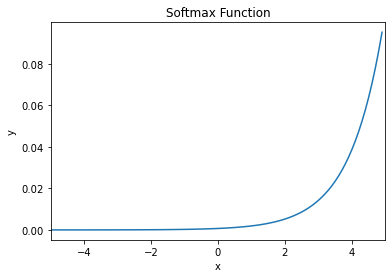

In [75]:
def softmax(x):
    y = np.exp(x) / np.sum(np.exp(x))
    return y

x = np.arange(-5.0, 5.0, 0.1)
y = softmax(x)

import matplotlib.pyplot as plt

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-5.0, 5.0)
plt.title("Softmax Function")
plt.show()

In [76]:
a = np.array([0.3, 2.9, 4.0])

softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

### 소프트맥스 함수 구현 시 주의점

이 함수를 컴퓨터로 계산할 때는 **오버플로 문제**라는 결함이 있다.

소프트맥스 함수는 지수 함수를 사용하는데, 지수 함수는 굉장히 큰 값을 내뱉는다.
자연스럽게 큰 값을 가지고 나눗셈을 하면 결과 수치가 **불안정**해진다.

이 문제를 해결하도록 소프트맥스 함수 구현을 개선해보자. 개선된 수식은 다음과 같다.

$$ y_k = \frac{exp(a_k)}{\sum_{i=1}^{n} {exp(a_k)}} = \frac{Cexp(a_k)}{C \sum_{i=1}^{n} {exp(a_k)}}\\
 = \frac{exp(a_k + logC)}{\sum_{i=1}^{n} {exp(a_k + logC)}} \\
 = \frac{exp(a_k + C^\prime)}{\sum_{i=1}^{n} {exp(a_k + C^\prime)}}$$

위 식이 말하는 것은 소프트맥스의 지수 함수를 계산할 때
**어떤 정수를 더해도 (혹은 빼도) 결과는 바뀌지 않는다** 라는 것이다.
여기서 $C^\prime$에 어떤 값을 대입해도 상관 없지만, 오버플로를 막을 목적으로는 **입력 신호 중 최대값을 이용**하는 것이 일반적이다.

In [77]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) # 제대로 계산되지 않음을 확인할 수 있다.

/var/folders/d7/8zsbg3r51rs_vl832mx18q_00000gn/T/ipykernel_46276/3803144697.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a)) # 제대로 계산되지 않음을 확인할 수 있다.
/var/folders/d7/8zsbg3r51rs_vl832mx18q_00000gn/T/ipykernel_46276/3803144697.py:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a)) # 제대로 계산되지 않음을 확인할 수 있다.


array([nan, nan, nan])

In [78]:
c = np.max(a) # c는 a의 최댓값
a - c # a에서 c의 최댓값을 빼준다.

array([  0, -10, -20])

In [79]:
np.exp(a - c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

입력 신호 중 최댓값을 빼주면 올바르게 계산할 수 있다.

따라서 소프트맥스 함수를 이와 같이 개선하면 :

In [80]:
def softmax(a):
    c = np.max(a)
    y = np.exp(a-c) / np.sum(np.exp(a-c))
    return y

softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

### 소프트맥스 함수의 특징

softmax() 함수를 사용하면 신경망의 출력은 다음과 같이 계산할 수 있다.

In [81]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

소프트맥스 함수의 출력은 **0에서 1.0 사이의 실수** 이며, 소프트맥스 함수 출력의 **총합은 1** 이다.

**소프트맥스 함수의 출력 총합이 1이 된다는 점은 소프트맥스 함수의 중요한 성질이다**

이러한 성질 때문에 소프트맥스 함수의 출력을 '확률'로 해석할 수 있다. 따라서 **분류 기법**에 특히 용이하다.

- 앞의 예에서 y[0]의 확률은 0.018, y[1]의 확률은 0.245, y[2]의 확률은 0.737으로 계산할 수 있다.
- 따라서 **"2번째 원소의 확률이 가장 높으니, 답은 2번째 클래스이다."** 또는, **"74%의 확률로 2번째 클래스, 25%의 확률로 첫 번째 클래스, 1%의 확률로 0번째 클래스이다."** 와 같이 확률적인 결론을 낼 수 있다.

주의할 점으로, 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다. 지수 함수 $y = exp(x)$가 단조 증가 함수이기 때문.

위의 예에서도 a의 원소들 사이의 대소 관계가 y의 원소들 사이의 대소 관계로 그대로 이어진다.

신경망을 이용한 분류에서는 일반적으로 **가장 큰 출력을 내는 뉴런에 해당하는 클래스**로만 인식한다.

결과적으로 신경망으로 분류할 때는 출력층의 소프트맥스 함수를 생략해도 되며, 지수 함수 계산에 드는 자원 낭비를 줄이고자 출력층의 소프트맥스 함수는 생략하는 것이 일반적이다.

<font color= blue> *Note. 기계 학습의 문제 풀이는 학습과 추론 두 단계를 거쳐 이뤄진다. 학습 단계에서 모델을 학습시키고, 추론 단계에서 학습된 모델로 미지의 데이터에 대해 추론을 수행한다. 추론 단계에서는 출력층의 소프트맥스 함수를 생략하는 것이 일반적이고, 신경망을 학습시킬 때는 출력층에서 소프트맥스 함수를 사용한다. </font>*

### 출력층의 뉴런 수 정하기

출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 한다.

분류에서는 **분류하고 싶은 클래스 수로 설정하는 것이 일반적**이다.

예를 들어 입력 이미지를 숫자 0부터 9 중 하나로 분류하는 문제라면 **출력층의 뉴런을 10개로 설정** 한다.

[교재 97페이지 그림 참고]

이 예에서 출력층 뉴런은 위에서부터 차례로 숫자 0, 1, ..., 9에 대응하며, 뉴런의 회색 농도가 해당 뉴런의 출력 값의 크기를 의미한다.

여기서는 색이 가장 짙은 y2(= y2일 가능성이 가장 높은) 뉴런이 가장 큰 값을 출력한다.

그래서 이 신경망이 선택한 클래스는 $y_2$, 즉, 입력 이미지를 **숫자 '2'로 판단했음을 의미** 한다.

## 손글씨 숫자 인식

신경망의 구조를 실전에 적용해보자.

학습 과정은 생략하고, 추론 과정만 구현한다. 이 추론 과정을 신경망의 **순전파(forward propagation)** 이라고 한다.

<font color = blue> *Note. 신경망 또한 훈련 데이터를 사용해 가중치 매개변수를 학습하고 ,추론 단계에서는 매개변수를 사용하여 입력 데이터를 분류한다.* </font>

In [82]:
%config Completer.use_jedi = False

import sys, os
os.chdir("/Users/choeunsol/deep-learning-from-scratch-master")
os.getcwd()

'/Users/choeunsol/deep-learning-from-scratch-master'

In [100]:
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten = True, normalize = False)

print(x_train.shape)

(60000, 784)


In [102]:
print(t_train.shape)

(60000,)


In [103]:
print(x_test.shape)

(10000, 784)


In [104]:
print(t_test.shape)

(10000,)


1. sys.path.append(os.pairdir)으로 부모 디렉터리의 파일을 가져올 수 있도록 설정

2. dataset에 있는 mnist에서 load_mnist()을 이용하여 mnist 파일을 읽는다.
- load_mnist가 MNIST 파일을 가져와야 하니 처음에는 인터넷에 연결된 상태여야 함.
- 두 번째부터는 로컬에 저장된 파일을 읽기 때문에 순식간에 끝난다.

3. load_mnist 함수는 읽은 mnist 데이터를 "**(훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)**" 형식으로 반환한다.
- 인수로는 normalize, flatten, one_hot_label 세 가지이다.
- normalize : 입력 이미지의 픽셀을 0.0 ~ 1.0으로 정규화할지를 정한다. False로 설정하면 입력 이미지의 픽셀은 0~255 사이의 값을 유지한다.
- flatten : 입력 이미지를 1차원 배열로 만들지를 정한다. False로 설정 시, 입력 이미지를 1 * 28 * 28의 3차원 배열로, True로 설정하면 784개의 원소롤 이루어진 1차원 배열로 저장.
- one_hot_label : 레이블을 **원-핫 인코딩** 형태로 저장할지를 정한다. 원-핫 인코딩은 정답을 뜻하는 원소만 1이고 **(핫하고)** 나머지는 모두 0인 배열이다. 이것이 False이면 one_hot_label이 False이면 숫자 형태의 레이블을 저장하고, True일 때는 레이블을 원-핫 인코딩하여 저장한다.

<font color = blue> *Note. 파이썬에는 pickle이라는 편리한 기능이 있다. 이는 프로그램 실행 중에 특정 객체를 파일로 저장하는 기능이다. 저장해둔 pickle 파일을 로드하면 실행 당시 객체를 즉시 복원할 수 있다. load_mnist() 함수에서도 (2번쨰 이후의 읽기 시) pickle을 이용한다.* </font>

그렇다면 확인을 위해 MNIST 이미지를 화면으로 불러오도록 하자.

이미지 표시에는 PIL 모듈을 사용한다.

In [105]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = \
load_mnist(flatten = True, normalize = False) # mnist 파일을 1차원 array로 출력하고, 0~1 사이의 정규화는 하지 않는다.

img = x_train[25]
label = t_train[25]
print(label)

2


In [106]:
print(img.shape)

(784,)


In [107]:
img = img.reshape(28 ,28) # 원래 이미지의 모양으로 변형
print(img.shape)

(28, 28)


In [90]:
img_show(img)

- flatten = TRUE로 설정해 읽어 들인 이미지는 1차원 넘파이 배열로 저장되어 있다. 그래서 이미지를 표시할 때는 원래 형상인 28 * 28 크기로 다시 변형해야 한다.
- reshape() 메서드에 원하는 형상을 인수로 저장하면 넘파이 배열의 형상을 바꿀 수 있다.
- 넘파이로 저장된 이미지 데이터를 PIL용 데이터 객체로 변환해야 하며, 이 변환은 Image.fromarray()가 수행한다.


## 신경망의 추론 처리

MNIST 데이터셋을 가지고 추론을 수행하는 신경망을 구현한다.

이 신경망은 입력층 뉴런을 784개, 출력층 뉴런을 10개로 구성한다.

입력층 뉴런이 784개인 이유는 **이미지 크기가 28 * 28 = 764** 이기 때문이고, 출력층 뉴런이 10개인 이유는 이 문제가 **0에서 9까지 10개의 숫자를 구분** 하는 문제이기 때문이다.

은닉층은 총 두 개로, 첫 번째 은닉층에서는 50개의 뉴런을, 두 번째 은닉층에는 100개의 뉴런을 배치할 것이다.

여기서 50과 100은 임의로 정한 값.

In [108]:
os.chdir("/Users/choeunsol/deep-learning-from-scratch-master/ch03")

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize = True, flatten = True, one_hot_label = False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3'] # 은닉층이 2개, 입력층 한 개이므로 3개의 가중치 벡터를 설정한다. 이 가중치들은 network에서 정의된다.
    b1, b2, b3 = network['b1'], network['b2'], network['b3'] # 마찬가지로 가중치도 세 개를 설정한다.
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1) # 1층의 활성화함수인 시그모이드 함수
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2) # 2층의 활성화함수인 시그모이드 함수
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3) # 출력층의 활성화함수인 소프트맥스 함수
    
    return y

- get_data() : mnist 패키지에 저장된 데이터를 읽어온다. normalize는 정규화, flatten은 1차원 벡터화, one_hot_label은 위 참고

- init_network() : pickle 파일인 sample_weight.pkl에 저장된 "학습된 가중치 매개변수"를 읽는다. 이 파일에는 **가중치와 편향 매개변수가 딕셔너리 변수로 저장**되어 있다.

- predict() : 위의 신경망 구성 함수와 같은 맥락. $x * w + b$임에 주목하자.

### 정확도

세 함수를 사용해 신경망에 의한 추론을 수행해보고, 정확도도 평가해보자.

In [111]:
import pickle

x, t = get_data() # get_data()에서 긁어온 데이터셋을 x,t에 저장한다. x는 시험에 사용할 데이터셋, t는 정답 레이블이다.
network = init_network()

accuracy_cnt = 0
for i in range(len(x)): # x의 길이 구간에서
    y = predict(network, x[i]) # predict() 함수는 각 레이블의 확률을 넘파이 배열로 반환한다. 아까 정의했던 함수이다.
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]: # 만약 p(확률이 가장 높은 원소)가 t(정답 레이블)와 일치한다면
        accuracy_cnt += 1 # accuracy_cnt에 +1한다.
        
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))
# accuracy_cnt을 실수화하고, 비율을 계산한 것을 문자열로 바꿔주어(str 함수) Accuracy와 붙여줄 수 있게 한다.

Accuracy:0.9352


정확도는 **분류가 얼마나 올바른가**를 평가하는 것.

<코드 해석>
1. MNIST 데이터셋을 앞에서 정의한 get_data() 함수로 얻는다.

2. 이어서 for 문을 돌며 x에 저장된 이미지 데이터를 1장씩 꺼내 predict() 함수로 분류한다.
- 예를 들어 $[0.1, 0.3, 0.2, ... , 0.04]$ 같은 배열이 반환된다.
- 이는 이미지가 숫자 0일 확률이 0.1, 1일 확률이 0.3 ... 이런 식으로 해석한다.

3. np.argmax() 함수로 **이 배열에서 값이 가장 큰(확률이 가장 높은) 원소의 인덱스**를 구한다.

4. 마지막으로 신경망이 예측한 답변과 정답 레이블을 비교하여 맞힌 숫자를 세고, 이를 전체 이미지 숫자로 나누어 정확도를 구한다.

정확도를 구한 결과는 93.52%. 우리는 신경망 구조와 학습 방법을 고민하면서 정확도를 더 높여갈 것.

여기에서는 load_mnist 함수의 인수인 normalize을 True로 설정.

이렇게 신경망의 입력 데이터에 특정 변환을 가하는 것을 전처리라 하고, 입력 이미지 데이터에 대한 전처리 작업으로 정규화를 수행.

### 배치 처리

입력 데이터와 가중치 매개변수의 형상에 주의해서 구현을 다시 한 번 살펴보자.

우선 앞서 구현한 신경망 각 층의 가중치 형상을 출력해보자.

In [116]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

x.shape

(10000, 784)

In [117]:
x[0].shape

(784,)

In [119]:
W1.shape # 28*28개의 뉴런이 앞 층, 50개의 1층 은닉층 뉴런이 뒤 층

(784, 50)

In [120]:
W2.shape # 50개의 1층 은닉층 뉴런이 앞 층, 100개의 2층 은닉층 뉴런이 뒤 층. 50*100 매트릭스.

(50, 100)

In [121]:
W3.shape # 100개의 2층 은닉층 뉴런이 앞 층, 10개의 2층 은닉층 뉴런이 뒤 층. 100*10 매트릭스.

(100, 10)

이 결과에서 다차원 배열의 대응하는 차원의 원소 수가 일치함을 확인할 수 있음.

x는 flatten한 28 * 28의 배열이므로 1 * 784의 배열.

전체적으로 보면 원소 784개로 구성된 1차원 배열이 입력되어 마지막에는 원소가 10개인 1차원 배열이 출력되는 흐름. 이는 이미지 데이터를 1장만 입력했을 때의 처리 흐름.

그렇다면 이미지 여러 장을 한꺼번에 입력하는 경우를 생각해보자.
가령 이미지 100개를 묶어 predict() 함수에 한 번에 너믹는 것.
그렇다면 $x$의 형상을 100 * 784로 바꾸어서 100장 분량의 데이터를 하나의 입력 데이터로 표현하면 될 것.

이렇게 한다면 출력 데이터 100 * 784의 결과값인 $y$는 100 * 10이 될 것.

이처럼 **하나로 묶은 입력 데이터를 배치** 라고 한다.

<font color = blue> *Note : 배치 처리는 컴퓨터로 계산할 때 이미지 1장 당 처리 시간을 대폭 줄여준다. 컴퓨터에서는 큰 배열을 한꺼번에 계산하는 것이 분할된 작은 배열을 여러 번 계산하는 것보다 빠르다* </font>

그렇다면 배치 처리를 구현해보자.

In [123]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size): # 0부터 len(x)까지 batch_size 간격인 i에서
    x_batch = x[i:i+batch_size] # x_batch는 batch의 길이를 가지는 데이터. i 부터 i+batch_size을 뽑아낸다.
    y_batch = predict(network, x_batch) # x_batch를 x로 두고, init_network인 network를 사용해 신경망을 구성한다.
    p = np.argmax(y_batch, axis = 1) # y_batch로 나오는 100*10개의 인수 중 확률이 가장 높은 것을 뽑아준다. 각 100개 행의 최대값에 대한 인덱스를 뽑아준다.
    accuracy_cnt += np.sum(p == t[i:i+batch_size]) # p가 t의 batch size만큼의 집합에 맞는지 count해준다.
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


1. range() : range(start, end)처럼 인수를 2개 지정해 호출하면 start에서 end-1까지의 정수를 차례로 반환하는 반복자를 돌려준다.
            range(start, end, step) 처럼 인수를 3개 지정해 호출하면 start에서 end-1까지 **step 간격으로 증가하는 정수를 반환** 한다.

In [125]:
# range() 함수의 활용 예시

list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [126]:
list(range(0,10,3)) # 0부터 10까지 3의 간격으로 뽑아준다.

[0, 3, 6, 9]

2. 이 range() 함수가 반환하는 반복자를 바탕으로 $x[i:i+batch_size]$에서 입력 데이터를 묶는다. $x[i:i+batch_size]$은 입력 데이터의 i번째부터 i+batch_size번째까지의 데이터를 묶는다.

- 이 예에서는 batch_size가 100이므로 $x[0:100], x[100:200], ...$와 같이 앞에서부터 100장씩 묶어 꺼내게 된다.

3. argmax() 함수는 최대값의 인덱스를 가져온다. 여기에서 axis = 1이라는 인수를 추가한 것에 주의하자.
- 이는 100 * 10의 배열 중 첫 번째 차원을 구성하는 각 원소에서 (1번째 차원을 축으로) 최댓값의 인덱스를 찾도록 한 것. 여기서 axis = 1은 행이다.

In [140]:
# argmax() 함수의 활용 예시
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]]) # 4*3 행렬
y = np.argmax(x, axis = 1) # axis = 1으로 하면 각 행의 최대치 index을 산출한다.
print(y)

[1 2 1 0]


4. 배치 단위로 분류한 결과를 실제 답과 비교한다. 이를 위해 == 연산자를 사용하해 넘파이 배열끼리 비교하여 True/False로 구성된 bool 배열을 만들고, 이 결과 배열에서 True가 몇 개인지 센다.

In [141]:
# np.sum의 예시, np.sum은 bool 배열의 True 개수를 세는 데 쓰인다.

y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y == t) # 논리형 연산자 (bool 배열)을 출력할 때 ==을 쓰는 것을 잊지 말자.
np.sum(y==t)

[ True  True False  True]


3